## Python for NLP: Introduction to the TextBlob Library
https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/

### Tokenization
Tokenization refers to splitting a large paragraph into sentences or words. Typically, a token refers to a word in a text document. Tokenization is pretty straight forward with TextBlob. All you have to do is import the TextBlob object from the textblob library, pass it the document that you want to tokenize, and then use the sentences and words attributes to get the tokenized sentences and attributes. Let's see this in action:

The first step is to import the TextBlob object:

In [5]:
from textblob import TextBlob

In [6]:
document = ("In computer science, artificial intelligence (AI), \
            sometimes called machine intelligence, is intelligence \
            demonstrated by machines, in contrast to the natural intelligence \
            displayed by humans and animals. Computer science defines AI \
            research as the study of \"intelligent agents\": any device that \
            perceives its environment and takes actions that maximize its\
            chance of successfully achieving its goals.[1] Colloquially,\
            the term \"artificial intelligence\" is used to describe machines\
            that mimic \"cognitive\" functions that humans associate with other\
            human minds, such as \"learning\" and \"problem solving\".[2]")

In [8]:
text_blob_object = TextBlob(document)

In [10]:
document_sentence = text_blob_object.sentences

print(document_sentence)

[Sentence("In computer science, artificial intelligence (AI),             sometimes called machine intelligence, is intelligence             demonstrated by machines, in contrast to the natural intelligence             displayed by humans and animals."), Sentence("Computer science defines AI             research as the study of "intelligent agents": any device that             perceives its environment and takes actions that maximize its            chance of successfully achieving its goals."), Sentence("[1] Colloquially,            the term "artificial intelligence" is used to describe machines            that mimic "cognitive" functions that humans associate with other            human minds, such as "learning" and "problem solving"."), Sentence("[2]")]


In [11]:
print(len(document_sentence))

4


In [13]:
document_words = text_blob_object.words

print(document_words)

['In', 'computer', 'science', 'artificial', 'intelligence', 'AI', 'sometimes', 'called', 'machine', 'intelligence', 'is', 'intelligence', 'demonstrated', 'by', 'machines', 'in', 'contrast', 'to', 'the', 'natural', 'intelligence', 'displayed', 'by', 'humans', 'and', 'animals', 'Computer', 'science', 'defines', 'AI', 'research', 'as', 'the', 'study', 'of', 'intelligent', 'agents', 'any', 'device', 'that', 'perceives', 'its', 'environment', 'and', 'takes', 'actions', 'that', 'maximize', 'its', 'chance', 'of', 'successfully', 'achieving', 'its', 'goals', '1', 'Colloquially', 'the', 'term', 'artificial', 'intelligence', 'is', 'used', 'to', 'describe', 'machines', 'that', 'mimic', 'cognitive', 'functions', 'that', 'humans', 'associate', 'with', 'other', 'human', 'minds', 'such', 'as', 'learning', 'and', 'problem', 'solving', '2']


In [14]:
print(len(document_words))

84


### Lemmatization

Lemmatization refers to reducing the word to its root form as found in a dictionary.

To perform lemmatization via TextBlob, you have to use the Word object from the textblob library, pass it the word that you want to lemmatize and then call the lemmatize method.

In [17]:
from textblob import Word

word1 = Word("apples")
print("apples:", word1.lemmatize())

word2 = Word("media")
print("media:", word2.lemmatize())

word3 = Word("greater")
print("greater:", word3.lemmatize("a"))

apples: apple
media: medium
greater: great


In the script above, we perform lemmatization on the words "apples", "media", and "greater". In the output, you will see the words "apple", (which is singular for the apple), "medium" (which is singular for the medium) and "great" (which is the positive degree for the word greater). Notice that for the word greater, we pass "a" as a parameter to the lemmatize method. This specifically tells the method that the word should be treated as an adjective. By default, the words are treated as nouns by the lemmatize() method. The complete list for the parts of speech components is as follows:

In [18]:
ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'

### Parts of Speech (POS) Tagging

In [20]:
for word, pos in text_blob_object.tags:
    print(word + " => " + pos)

In => IN
computer => NN
science => NN
artificial => JJ
intelligence => NN
AI => NNP
sometimes => RB
called => VBD
machine => NN
intelligence => NN
is => VBZ
intelligence => NN
demonstrated => VBN
by => IN
machines => NNS
in => IN
contrast => NN
to => TO
the => DT
natural => JJ
intelligence => NN
displayed => VBN
by => IN
humans => NNS
and => CC
animals => NNS
Computer => NNP
science => NN
defines => NNS
AI => NNP
research => NN
as => IN
the => DT
study => NN
of => IN
intelligent => JJ
agents => NNS
any => DT
device => NN
that => WDT
perceives => VBZ
its => PRP$
environment => NN
and => CC
takes => VBZ
actions => NNS
that => IN
maximize => VB
its => PRP$
chance => NN
of => IN
successfully => RB
achieving => VBG
its => PRP$
goals => NNS
[ => RB
1 => CD
] => NNP
Colloquially => NNP
the => DT
term => NN
artificial => JJ
intelligence => NN
is => VBZ
used => VBN
to => TO
describe => VB
machines => NNS
that => IN
mimic => JJ
cognitive => JJ
functions => NNS
that => WDT
humans => NNS
associate

#### Convert Text to Singular and Plural

In [22]:
text = ("Football is a good game. It has many health benefit")
text_blob_object = TextBlob(text)
print(text_blob_object.words.pluralize())

['Footballs', 'iss', 'some', 'goods', 'games', 'Its', 'hass', 'manies', 'healths', 'benefits']


In [23]:
text = ("Footballs is a goods games. Its has many healths benefits")

text_blob_object = TextBlob(text)
print(text_blob_object.words.singularize())

['Football', 'is', 'a', 'good', 'game', 'It', 'ha', 'many', 'health', 'benefit']


#### Noun Phrase Extraction

In [25]:
text_blob_object = TextBlob(document)
for noun_phrase in text_blob_object.noun_phrases:
    print(noun_phrase)

computer science
artificial intelligence
ai
machine intelligence
natural intelligence
computer
science defines
ai
intelligent agents
colloquially
artificial intelligence
describe machines
human minds


#### Getting Words and Phrase Counts

In [27]:
text_blob_object = TextBlob(document)
text_blob_object.word_counts['intelligence']

5

In [29]:
text_blob_object.words.count('intelligence', case_sensitive=True)

5

In [30]:
text_blob_object = TextBlob(document)
text_blob_object.noun_phrases.count('artificial intelligence')

2

#### Converting to Upper and Lowercase

In [32]:
text = "I love to watch football, but I have never played it"
text_blob_object = TextBlob(text)

print(text_blob_object.upper())

I LOVE TO WATCH FOOTBALL, BUT I HAVE NEVER PLAYED IT


#### Finding N-Grams

N-Grams refer to n combination of words in a sentence. For instance, for a sentence "I love watching football", some 2-grams would be (I love), (love watching) and (watching football). N-Grams can play a crucial role in text classification.

In TextBlob, N-grams can be found by passing the number of N-Grams to the ngrams method of the TextBlob object. Look at the following example:

In [33]:
text = "I love to watch football, but I have never played it"
text_blob_object = TextBlob(text)
for ngram in text_blob_object.ngrams(2):
    print(ngram)

['I', 'love']
['love', 'to']
['to', 'watch']
['watch', 'football']
['football', 'but']
['but', 'I']
['I', 'have']
['have', 'never']
['never', 'played']
['played', 'it']


#### Spelling Corrections

In [36]:
text = "I love to watchf footbal, but I have neter played it"
text_blob_object = TextBlob(text)

print(text_blob_object.correct())

I love to watch football, but I have never played it


### Language Translation

One of the most powerful capabilities of the TextBlob library is to translate from one language to another. On the backend, the TextBlob language translator uses the Google Translate API

In [38]:
text_blob_object_french = TextBlob(u'Salut comment allez-vous?')
print(text_blob_object_french.translate(to='en'))

Hi, how are you?


In [39]:
text_blob_object_arabic = TextBlob(u'مرحبا كيف حالك؟')
print(text_blob_object_arabic.translate(to='en'))

Hello how are you?


In [40]:
text_blob_object = TextBlob(u'Hola como estas?')
print(text_blob_object.detect_language())

es


### Text Classification

TextBlob also provides basic text classification capabilities. Though, I would not recommend TextBlob for text classification owing to its limited capabilities, however, if you have a really limited data and you want to quickly develop a very basic text classification model, then you may use TextBlob. For advanced models, I would recommend machine learning libraries such as Scikit-Learn or Tensorflow.

Let's see how we can perform text classification with TextBlob. The first thing we need is a training dataset and test data. The classification model will be trained on the training dataset and will be evaluated on the test dataset.

In [45]:
train_data = [
    ('This is an excellent movie', 'pos'),
    ('The move was fantastic I like it', 'pos'),
    ('You should watch it, it is brilliant', 'pos'),
    ('Exceptionally good', 'pos'),
    ("Wonderfully directed and executed. I like it", 'pos'),
    ('It was very boring', 'neg'),
    ('I did not like the movie', 'neg'),
    ("The movie was horrible", 'neg'),
    ('I will not recommend', 'neg'),
    ('The acting is pathetic', 'neg')
]

In [46]:
test_data = [
    ('Its a fantastic series', 'pos'),
    ('Never watched such a brillent movie', 'pos'),
    ("horrible acting", 'neg'),
    ("It is a Wonderful movie", 'pos'),
    ('waste of money', 'neg'),
    ("pathetic picture", 'neg')
]

In [47]:
from textblob.classifiers import NaiveBayesClassifier

In [48]:
classifier = NaiveBayesClassifier(train_data)

In [49]:
print(classifier.classify("It is very boring"))

neg


In [50]:
print(classifier.classify("It's a fantastic series"))

neg


In [51]:
sentence = TextBlob("It's a fantastic series.", classifier=classifier)
print(sentence.classify())

neg


In [52]:
classifier.accuracy(test_data)

0.6666666666666666

In [53]:
classifier.show_informative_features(3)

Most Informative Features
            contains(it) = False             neg : pos    =      2.2 : 1.0
          contains(like) = True              pos : neg    =      1.7 : 1.0
           contains(was) = True              neg : pos    =      1.7 : 1.0


### Sentiment Analysis

In this section, we will analyze the sentiment of the public reviews for different foods purchased via Amazon. We will use the TextBlob sentiment analyzer to do so.

The dataset can be downloaded from this Kaggle link (https://www.kaggle.com/snap/amazon-fine-food-reviews) and (https://www.kaggle.com/sdxingaijing/topic-model-lda-algorithm/data).

As a first step, we need to import the dataset. We will only import the first 20,000 records due to memory constraints. You can import more records if you want. The following script imports the dataset:

In [61]:
import pandas as pd
import numpy as np

reviews_datasets = pd.read_csv(r'data/Reviews.csv')
reviews_datasets = reviews_datasets.head(20000)
reviews_datasets.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


In [62]:
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


/home/rodrigo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


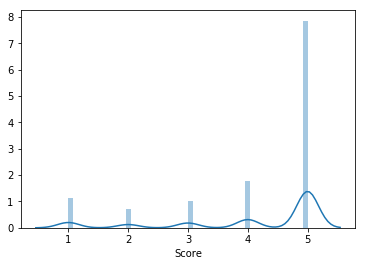

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(reviews_datasets['Score'])

You can see that most of the ratings are highly positive i.e. 5. Let's plot the bar plot for the ratings to have a better look at the number of records for each rating.

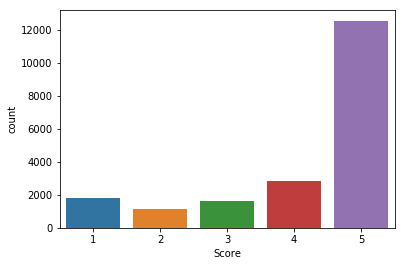

In [66]:
sns.countplot(x='Score', data=reviews_datasets)

The output shows that more than half of reviews have 5-star ratings.

In [68]:
reviews_datasets['Text'][350]

'These chocolate covered espresso beans are wonderful!  The chocolate is very dark and rich and the "bean" inside is a very delightful blend of flavors with just enough caffine to really give it a zing.'

In [70]:
text_blob_object = TextBlob(reviews_datasets['Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.39666666666666667, subjectivity=0.6616666666666667)


In [71]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

reviews_datasets['Sentiment_Polarity'] = reviews_datasets['Text'].apply(find_pol)
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


/home/rodrigo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


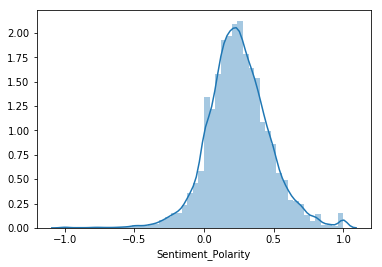

In [74]:
# Now let's see the distribution of polarity in our dataset. Execute the following script:
sns.distplot(reviews_datasets['Sentiment_Polarity'])

It is evident from the figure above that most of the reviews are positive and have polarity between 0 and 0.5. This is natural since most of the reviews in the dataset have 5-star ratings.

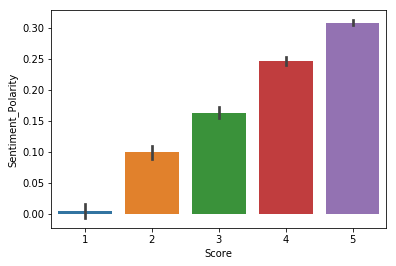

In [75]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=reviews_datasets)

In [76]:
most_negative = reviews_datasets[reviews_datasets.Sentiment_Polarity == -1].Text.head()
print(most_negative)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [77]:
reviews_datasets['Text'][545]

'These chips are nasty.  I thought someone had spilled a drink in the bag, no the chips were just soaked with grease.  Nasty!!'

In [78]:
most_positive = reviews_datasets[reviews_datasets.Sentiment_Polarity == 1].Text.head()
print(most_positive)

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object


In [79]:
reviews_datasets['Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

In [80]:
reviews_datasets['Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'